## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [7]:
results = {}
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with L1 = 0.010000, L2 = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions fo

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 36us/step - loss: 198.5004 - acc: 0.2414 - val_loss: 41.0549 - val_acc: 0.2606
Epoch 2/10
50000/50000 [==============================] - 1s 27us/step - loss: 19.0790 - acc: 0.1182 - val_loss: 7.2794 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 1s 27us/step - loss: 4.1030 - acc: 0.1000 - val_loss: 2.6467 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 1s 29us/step - loss: 2.4865 - acc: 0.0983 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 1s 26us/step - loss: 2.4626 - acc: 0.0986 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 1s 28us/step - loss: 2.4626 - acc: 0.1000 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 1s 28us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4626 - val

50000/50000 [==============================] - 1s 27us/step - loss: 5.3614 - acc: 0.4387 - val_loss: 5.3239 - val_acc: 0.4369
Epoch 7/10
50000/50000 [==============================] - 1s 27us/step - loss: 5.2611 - acc: 0.4513 - val_loss: 5.2290 - val_acc: 0.4472
Epoch 8/10
50000/50000 [==============================] - 1s 26us/step - loss: 5.1654 - acc: 0.4610 - val_loss: 5.1398 - val_acc: 0.4536
Epoch 9/10
50000/50000 [==============================] - 1s 27us/step - loss: 5.0727 - acc: 0.4704 - val_loss: 5.0490 - val_acc: 0.4618
Epoch 10/10
50000/50000 [==============================] - 1s 27us/step - loss: 4.9839 - acc: 0.4776 - val_loss: 4.9672 - val_acc: 0.4697
Experiment with L1 = 0.000100, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 33us/step - loss: 15.0723 - acc: 0.2737 - val_loss: 13.9381 - val_acc: 0.3312
Epoch 2/10
50000/50000 [==============================] - 1s 26us/step - loss: 12.9991 - acc: 0.3567 - val_loss: 12.1086 - val_acc: 0.3691
Epoch 3/10
50000/50000 [==============================] - 1s 26us/step - loss: 11.3290 - acc: 0.3796 - val_loss: 10.5857 - val_acc: 0.3853
Epoch 4/10
50000/50000 [==============================] - 1s 26us/step - loss: 9.9173 - acc: 0.3954 - val_loss: 9.2825 - val_acc: 0.3975
Epoch 5/10
50000/50000 [==============================] - 1s 27us/step - loss: 8.7188 - acc: 0.4064 - val_loss: 8.1790 - val_acc: 0.4056
Epoch 6/10
50000/50000 [==============================] - 1s 26us/step - loss: 7.6977 - acc: 0.4147 - val_loss: 7.2365 - val_acc: 0.4201
Epoch 7/10
50000/50000 [==============================] - 1s 27us/step - loss: 6.8276 - acc: 0.4216 - val_loss: 6.4323 - v

50000/50000 [==============================] - 1s 29us/step - loss: 1.5771 - acc: 0.4476 - val_loss: 1.5737 - val_acc: 0.4437
Epoch 7/10
50000/50000 [==============================] - 1s 28us/step - loss: 1.5420 - acc: 0.4600 - val_loss: 1.5385 - val_acc: 0.4573
Epoch 8/10
50000/50000 [==============================] - 1s 28us/step - loss: 1.5103 - acc: 0.4706 - val_loss: 1.5169 - val_acc: 0.4618
Epoch 9/10
50000/50000 [==============================] - 1s 28us/step - loss: 1.4829 - acc: 0.4778 - val_loss: 1.5168 - val_acc: 0.4663
Epoch 10/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.4567 - acc: 0.4881 - val_loss: 1.4853 - val_acc: 0.4690
Experiment with L1 = 0.000000, L2 = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2s 34us/step - loss: 2.0460 - acc: 0.2700 - val_loss: 1.8733 - val_acc: 0.3356
Epoch 2/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.8162 - acc: 0.3624 - val_loss: 1.7665 - val_acc: 0.3827
Epoch 3/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.7368 - acc: 0.3909 - val_loss: 1.7039 - val_acc: 0.4091
Epoch 4/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.6811 - acc: 0.4100 - val_loss: 1.6641 - val_acc: 0.4159
Epoch 5/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.6361 - acc: 0.4277 - val_loss: 1.6192 - val_acc: 0.4332
Epoch 6/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.5982 - acc: 0.4407 - val_loss: 1.5859 - val_acc: 0.4429
Epoch 7/10
50000/50000 [==============================] - 1s 26us/step - loss: 1.5635 - acc: 0.4534 - val_loss: 1.5582 - val_acc

50000/50000 [==============================] - 1s 25us/step - loss: 7.6946 - acc: 0.4202 - val_loss: 7.2364 - val_acc: 0.4214
Epoch 7/10
50000/50000 [==============================] - 1s 25us/step - loss: 6.8246 - acc: 0.4254 - val_loss: 6.4437 - val_acc: 0.4210
Epoch 8/10
50000/50000 [==============================] - 1s 24us/step - loss: 6.0802 - acc: 0.4340 - val_loss: 5.7441 - val_acc: 0.4319
Epoch 9/10
50000/50000 [==============================] - 1s 25us/step - loss: 5.4451 - acc: 0.4356 - val_loss: 5.1724 - val_acc: 0.4334
Epoch 10/10
50000/50000 [==============================] - 1s 25us/step - loss: 4.9029 - acc: 0.4401 - val_loss: 4.6599 - val_acc: 0.4402
Experiment with L1 = 0.000000, L2 = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 1s 28us/step - loss: 2.0147 - acc: 0.2869 - val_loss: 1.8603 - val_acc: 0.3401
Epoch 2/10
50000/50000 [==============================] - 1s 24us/step - loss: 1.7964 - acc: 0.3690 - val_loss: 1.7493 - val_acc: 0.3845
Epoch 3/10
50000/50000 [==============================] - 1s 24us/step - loss: 1.7132 - acc: 0.3991 - val_loss: 1.6850 - val_acc: 0.4108
Epoch 4/10
50000/50000 [==============================] - 1s 24us/step - loss: 1.6555 - acc: 0.4203 - val_loss: 1.6421 - val_acc: 0.4238
Epoch 5/10
50000/50000 [==============================] - 1s 24us/step - loss: 1.6097 - acc: 0.4356 - val_loss: 1.5935 - val_acc: 0.4401
Epoch 6/10
50000/50000 [==============================] - 1s 25us/step - loss: 1.5720 - acc: 0.4492 - val_loss: 1.5696 - val_acc: 0.4495
Epoch 7/10
50000/50000 [==============================] - 1s 27us/step - loss: 1.5413 - acc: 0.4604 - val_loss: 1.5495 - val_acc

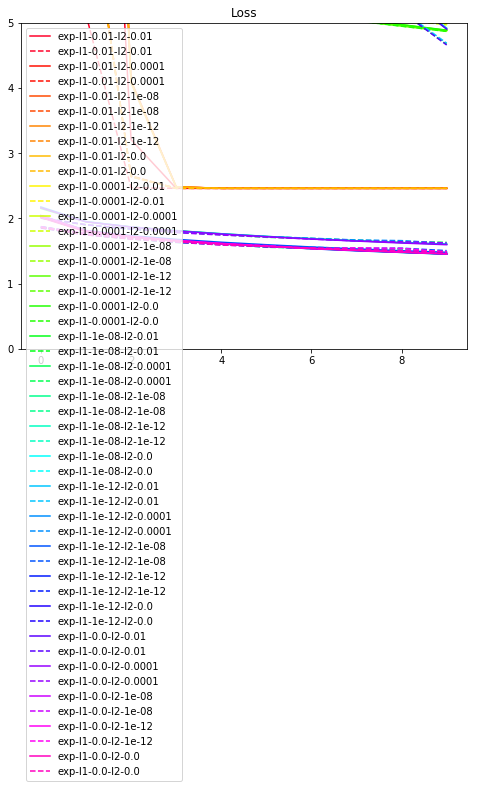

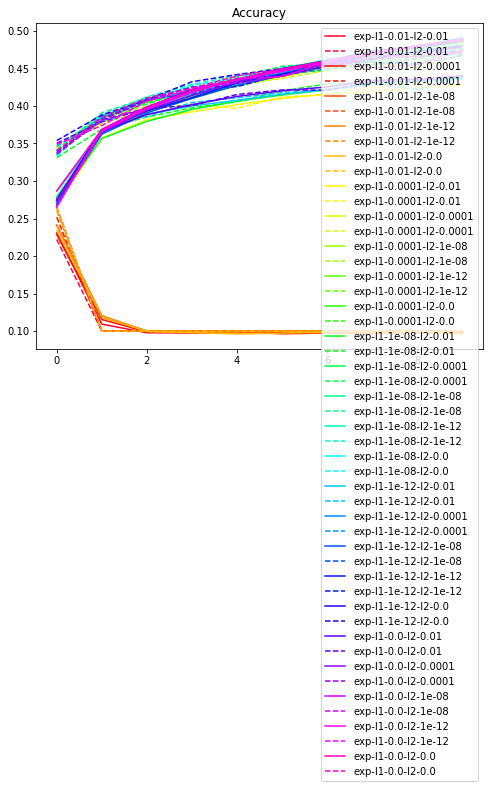

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()